# HelloWorld in `web3.py`
---  
<a id='start'></a>

# Some Review 👨‍🏫🙇‍♂️

## What is `web3.py`?
> - Python library to interact with `Ethereum` blockchain
> - Standard Python -> `web3.py` -> `brownie`   
> - `web3.py` : `brownie` <=> `numpy` : `Pytorch`

## What is an ABI?
> - ABI = Application Binary Interface
> - contains all necessary data about the contract in `json` form:
>   - name of functions
>   - variables
>   - ...

## What is a nonce?
> - an arbitrary number that can be used just once in cryptographic communication.
> - input value to create the hash   
>    - Which input value?  
>        - usually: a random number      
>        - in `Ganache`: address  
>        - in `Ethernet`: number of transactions (to get from `MetaMask`)  

In [360]:
# example for hashing?
import hashlib
nonce = b"A-stupid-Password"
hashlib.sha256(nonce).hexdigest()
# the same input should always result into the same hash, but its not possible to extract the input from the hash

'b9a66411bef05d5d716a182ec067b19c3c18caf4c4fd9ea4a55432bde225fbc9'

# Task 👩🏾‍💻: _Hello World! from Blockchain_
> ### Store _Hello World_ in blockchain 

## General Workflow
>1️⃣ create `.sol` --> 2️⃣ read & compile `.sol` --> 3️⃣ build contract --> 4️⃣  deploy --> 5️⃣ read/write

## 1️⃣. Create `helloworld.sol`

In [1]:
# . sol should be in same directory
!ls

HelloWorld?️.ipynb     __pycache__            helper.py
StoreImage.sol         helloworld.sol         img


## 2️⃣. Read and compile `helloworld.sol`

>🛍 🛒  : `helloworld.sol`

### Reading Solidity File into Python (📺  [03:38:51](https://www.youtube.com/watch?v=M576WGiDBdQ&t=13131s))

In [2]:
with open("./helloworld.sol", "r") as file:
    f = file.read()

In [ ]:
print(f)

### Compile (📺  [03:42:01](https://www.youtube.com/watch?v=M576WGiDBdQ&t=13321s))

In [3]:
# MINIMUM COMPILE
from solcx import compile_standard 
c = compile_standard(
    {
    "language": "Solidity",
    "sources": {"helloworld.sol": {"content": f}},
    }
)
# -> creates dict with keys: errors, sources

---   
>🧐 If any errors in `.sol` -> here will be the error message printed ☝️   
---

In [4]:
c.keys()

dict_keys(['errors', 'sources'])

In [5]:
# FULL COMPILE
c = compile_standard(
    {
    "language": "Solidity",
    "sources": {"helloworld.sol": {"content": f}},
    # 👇🏻 added to ["contracts"]['helloworld.sol']["HelloWorld"]
    "settings": {"outputSelection": {"*": {"*": ["abi", "metadata", "evm.bytecode", "evm.bytecode.sourceMap"] }}},
    
    },
    solc_version = "0.8.12"
)
# -> creates dict with keys: errors, sources & >>>contracts<<<

In [6]:
c.keys()

dict_keys(['contracts', 'errors', 'sources'])

## 3️⃣. Build Contract 📜

>🛍 🛒  : 
- c=compiled helloworld.sol    
    - abi   
    - b=bytecode  
- account data from `Ganache` 
    - http

In [7]:
# Where are the parameters for my contract?
c["contracts"]["helloworld.sol"]["HelloWorld"].keys()

dict_keys(['abi', 'evm', 'metadata'])

In [8]:
# find ABI % bytecode
c["contracts"]['helloworld.sol']["HelloWorld"].keys()

dict_keys(['abi', 'evm', 'metadata'])

In [9]:
# ABI
abi = c["contracts"]['helloworld.sol']["HelloWorld"]["abi"]
# BYTECODE
b = c["contracts"]['helloworld.sol']["HelloWorld"]["evm"]["bytecode"]["object"]

In [10]:
abi

[{'inputs': [],
  'name': 'read_message',
  'outputs': [{'internalType': 'string', 'name': '', 'type': 'string'}],
  'stateMutability': 'view',
  'type': 'function'},
 {'inputs': [{'internalType': 'string', 'name': 't', 'type': 'string'}],
  'name': 'write_message',
  'outputs': [],
  'stateMutability': 'nonpayable',
  'type': 'function'}]

In [11]:
b[:200]

'60806040526040518060400160405280601981526020017f48656c6c6f20576f726c642066726f6d205368616e67686169000000000000008152506000908051906020019061004f929190610062565b5034801561005c57600080fd5b50610166565b82'

---   
>🧐 Actually, the first time we use `web3.py`:   
---

In [12]:
from web3 import Web3 #<- web3.py libary

w3 = Web3(Web3.HTTPProvider("http://0.0.0.0:8545")) #<- Ganache

#### 👆🏻 Account Data from `Ganache` 🖼 👇🏻

![](img/ganache_account-data.png)

In [13]:
# build web3.py contract object
contract = w3.eth.contract(abi=abi, bytecode=b)

## 4️⃣. Deploying 🚀 (📺 [03:48:28](https://www.youtube.com/watch?v=M576WGiDBdQ&t=13708s))

>🛍 🛒 :  
>- contract   
>- account data from `Ganache`:
>    - abi   
>    - bytecode  
>    - from_address  
>    - chain_id
>    - nonce
>    - private_key

### Deploy to Ganache (📺 [3:52:27](https://youtu.be/M576WGiDBdQ))

1. Build transaction 🏗
2. Sign transaction 🖋
3. Send transaction 📩

#### 1. Build Transaction 🏗  (📺 [03:57:03](https://www.youtube.com/watch?v=M576WGiDBdQ&t=14223s))

In [14]:
# ACCOUNT DATA FROM GANACHE
chain_id = 1337
address = "0x487724Ea5256468549e67461Dd184e576D8830aA"
private_key = "0x" + "808b3d99b7d1ebd3aecfaf33bbf1dbb99dacb7ee966a403f404164ceb338566c"

In [15]:
# nonce = number of transactions in that account
nonce = w3.eth.getTransactionCount(address)
nonce

127

---   
>🧐 We need contructor object, because we have no constructor in `helloworld.sol`:   
---

In [16]:
# create transaction object
tx = contract.constructor().buildTransaction({"chainId": chain_id, "from": address, "nonce": nonce, "gasPrice": w3.eth.gas_price})

---   
>🧐 Course did not mention to add `gas_price` - but without it does not work!   
---

#### 2. Signing Transaction (📺 [04:00:55](https://www.youtube.com/watch?v=M576WGiDBdQ&t=14455s))

In [17]:
# Get latest transaction
tx_id = w3.eth.get_block('latest')["transactions"][-1] #<-last transaction from list of transactions in Ganache
tx_id

HexBytes('0xfa6b5221540553d80f4ffe11ea8a8c8e0e4a6e15a3c9c65c2241f4880a93f60c')

---   
>🧐 The private key 🔑  is our signature 📜🖋 
---

In [18]:
signed_tx = w3.eth.account.sign_transaction(transaction_dict=tx, private_key=private_key)

#### Type of addresses/hashs

|NAME|TYPE|FROM WHERE|
|---|---|---|
|`address`|blockchain account |Ganache: _Accounts (up to 10)_|
|||Metamask: network/account | 
|`private_key`|with address associated private key|---|
|`tx_id`|transaction address|when building transaction|
|`signed_tx`|with private key signed transaction address|from `tx_id`|
|`ca`|contract address|Ganache: _Transaction/Contract Creation_|
|`cb`|build contract|---|
|`cd`|deployed contract|---|
|`to_address`|account address||

In [19]:
# we can always check if hash is address or not
print(w3.isAddress(address))
print(w3.isAddress(tx_id))

True
False


#### 3. Send transaction 📩  (📺 [04:07:03](https://www.youtube.com/watch?v=M576WGiDBdQ&t=14823s))

In [20]:
# send this signed transaction
#tx_hash = w3.eth.send_raw_transaction(signed_tx.rawTransaction)
signed_tx = w3.eth.send_raw_transaction(signed_tx.rawTransaction)
signed_tx

HexBytes('0xd92c1986c797eaab1cd0fca83c31a521c1a782a5821d2384fa4bd603abbbffa1')

In [21]:
# confirmation of transaction
tx_receipt = w3.eth.wait_for_transaction_receipt(signed_tx)

# CREATE CONTRACT OBJECT
ca = tx_receipt.contractAddress
ca

'0xb68F745f598dAAe2FffF420fEF1461aA532170C9'

... ⌛️ check transaction in `Ganache`:
![](img/transaction.png)

#### All transaction information are under _/TRANSACTIONS/CONTRACT CREATION_ in `Ganache` or via w3:

In [22]:
tx_id

HexBytes('0xfa6b5221540553d80f4ffe11ea8a8c8e0e4a6e15a3c9c65c2241f4880a93f60c')

In [23]:
# transaction number can also be extracted from receipt
tx_receipt.transactionHash #= tx_id

HexBytes('0xd92c1986c797eaab1cd0fca83c31a521c1a782a5821d2384fa4bd603abbbffa1')

In [24]:
# how much gas did it cost?
tx_receipt.gasUsed

289212

In [25]:
# gas in real money (US-$)?
# gas (in ether) x gas-price x dollar/ether-price
print("US-$: {:.2f}".format(tx_receipt.gasUsed /10**18 * 20000000000*2590))
# 🧐 probably not right!

US-$: 14.98


In [26]:
# information about block
block = w3.eth.get_block("latest") # = w3.eth.get_block("149")

In [27]:
x = tx_receipt.items()#["transactionHash"]
tx_receipt

AttributeDict({'transactionHash': HexBytes('0xd92c1986c797eaab1cd0fca83c31a521c1a782a5821d2384fa4bd603abbbffa1'),
 'transactionIndex': 0,
 'blockHash': HexBytes('0x918ecf93163167c0c2444c8df0c991fccc06fe63ac77ac4ddc559202c5c39a0e'),
 'blockNumber': 264,
 'from': '0x487724Ea5256468549e67461Dd184e576D8830aA',
 'to': None,
 'gasUsed': 289212,
 'cumulativeGasUsed': 289212,
 'contractAddress': '0xb68F745f598dAAe2FffF420fEF1461aA532170C9',
 'logs': [],
 'status': 1,
 'logsBloom': HexBytes('0x000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [28]:
#CREATED CONTRACT ADDRESS (in Ganache/Transaction/Contract Creation)
ca = tx_receipt.contractAddress
ca

'0xb68F745f598dAAe2FffF420fEF1461aA532170C9'

![](img/contract_creation.png)

## 5️⃣. Read from contract 🙇‍♂️ (📺 [04:10:28](https://www.youtube.com/watch?v=M576WGiDBdQ&t=15028s))

>🧐 **Call** -> simulate making the call and getting a return value (no state change to blockchain, = blue icons in `remix`)

In [29]:
cd = w3.eth.contract(address=ca, abi=abi) # <- creates a contract object
cd.functions.read_message().call() #read_message() = function in helloworld.sol

'Hello World from Shanghai'

### Workaround (to shorten things up) 🛣
>The next cell loads the contract object in one step (without going again thru every cell above)  
>So we can: _change `*.sol` -> see results -> change `*.sol` -> see results -> ..._

In [30]:
%load_ext autoreload
%autoreload
from helper import create_contract_object
ca, cd = create_contract_object(sol_file="helloworld.sol", RPC_Server = "http://0.0.0.0:8545", chain_id = 1337, 
                            address = "0x487724Ea5256468549e67461Dd184e576D8830aA", 
                            private_key="808b3d99b7d1ebd3aecfaf33bbf1dbb99dacb7ee966a403f404164ceb338566c")

cd.functions.read_message().call()

'Hello World from Shanghai'

In [31]:
# just created contract address
ca

'0x65f69fcF35f964adA1DC2dF3ffEEcd3D0669c01c'

In [32]:
# to get the transaction hash
tx_id = w3.eth.get_block('latest')["transactions"][-1]
tx_id

HexBytes('0xd6a4996f219b035133dd252883838d0a335f4b7f3203ed80a0297c1159f813ba')

![](img/transaction2.png)

In [34]:
# and to get the gas we used
tx_receipt = w3.eth.wait_for_transaction_receipt(tx_id)
tx_receipt.gasUsed

289212

## 5️⃣. Write into contract 🙇‍♂️ (📺 [04:15:14](https://www.youtube.com/watch?v=M576WGiDBdQ&t=15314s))

>🧐 **Transact** -> makes a state change to the blockchain (= orange icons in `remix`)

In [35]:
# LETS WRITE INSTEAD:
new_message = "Hello World from Ukraine!"

In [36]:
# WRITE TO CONTRACT

# 1. build transaction
nonce = w3.eth.getTransactionCount(address)
txn = cd.functions.write_message(new_message).buildTransaction(
    {"chainId": chain_id, "from": address, "nonce": nonce, "gasPrice": w3.eth.gas_price})
# 2. sign the transaction
signed_txn = w3.eth.account.sign_transaction(transaction_dict=txn, private_key=private_key)
# 3. send this signed transaction
tx_hash = w3.eth.send_raw_transaction(signed_txn.rawTransaction)
tx_receipt = w3.eth.wait_for_transaction_receipt(tx_hash)

In [37]:
# READ NEW MESSAGE
cd.functions.read_message().call()

'Hello World from Ukraine!'

In [38]:
print("Deployed contract: ", cd.address)
tx_id = w3.eth.get_block('latest')["transactions"][-1] #=tx_hash
print("Transaction hash: ", tx_id.hex())
print("Gas used: ", tx_receipt.gasUsed)

Deployed contract:  0x65f69fcF35f964adA1DC2dF3ffEEcd3D0669c01c
Transaction hash:  0x6e2e5e3d4f681fa03ce344a450b114e8a21bc5ae9f3670138485999223348142
Gas used:  29300


>👆🏻 this creates new `contract call` in `Ganache`: 👇🏻

![](img/transaction3.png)

# Another Task 👩🏾‍💻: _store image in blockkchain_
> ### We are in Ukraine 🇺🇦 - its still war ⚔️🛡 - we observe a war crime 🦹‍♂️💣i - we took a picture 📸 - we want to secure it 📦  for International Criminal Court in Den Haag 🏛 
> 😃🚀 Upload a picture to blockchain

## What do we need? 🛒🛍
- 📸     (obviously 😉)   
- Blockchain Account
    - Ganache
- `StoreImage.sol`


## Get Image 📸 and some Data Wrangling 🤼‍♀️

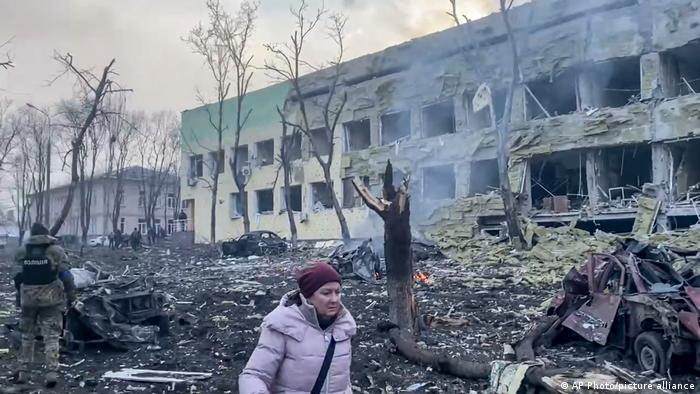

In [39]:
from PIL import Image
img = Image.open("img/bombing_ukraine.jpg")
display(img)

In [40]:
# lets make that picture smaller and b&w to speed up the process ...
from PIL import ImageOps
basewidth = 50
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img_new = img.resize((basewidth,hsize), Image.ANTIALIAS)
print(f"size before: {img.size} and after: {img_new.size}")
w,h = img_new.size
img_small = ImageOps.grayscale(img_new)
display(img_small)

size before: (700, 394) and after: (50, 28)


In [41]:
# CONVERT IMAGE -> STRING
%autoreload
from helper import image_to_string
img, size = image_to_string(img_small)
img[:100]

'189, 193, 195, 198, 203, 208, 209, 209, 215, 219, 218, 219, 219, 221, 213, 198, 227, 205, 207, 215, '

## Store Image in Blockchain 🛫

In [42]:
#%load_ext autoreload
%autoreload
import time as time
t0=time.time()

from helper import create_contract_object
ca, cd = create_contract_object(sol_file="StoreImage.sol", RPC_Server = "http://0.0.0.0:8545", chain_id = 1337, 
                            address = "0x4333474068373fE27537f28c7c177C85532f6A2C", 
                            private_key="30099c2c8d76f918f1f79d64226bc7a9f8f0b6f3b1999429cdd4d1a3eda573e4")
t1=time.time()
print(f"Time: {t1-t0:.2f}sec")

Time: 0.36sec


In [43]:
# Store Image
t0=time.time()

# 1. build transaction
nonce = w3.eth.getTransactionCount(address)
txn = cd.functions.set(str(size),img).buildTransaction(
    {"chainId": chain_id, "from": address, "nonce": nonce, "gasPrice": w3.eth.gas_price})

# 2. sign the transaction
signed_txn = w3.eth.account.sign_transaction(transaction_dict=txn, private_key=private_key)

# 3. send this signed transaction
tx_hash = w3.eth.send_raw_transaction(signed_txn.rawTransaction)
tx_receipt = w3.eth.wait_for_transaction_receipt(tx_hash)

t1=time.time()
print(f"Time: {t1-t0:.2f}sec")

Time: 3.91sec


## Load Image from Blockchain 🛬

In [44]:
# Load dimension of image
size = cd.functions.get_size().call()

# convert string to tuple
size = size[1:-1].split(", ")
size = (int(size[0]),int(size[1])) #build tuple
size

(50, 28)

In [45]:
# Load image
img = cd.functions.get_image().call()
img[:100]

'189, 193, 195, 198, 203, 208, 209, 209, 215, 219, 218, 219, 219, 221, 213, 198, 227, 205, 207, 215, '

In [46]:
# RECONVERT STRING -> IMAGE
%autoreload
from helper import string_to_image
image_from_blockchain = string_to_image(img, size)
display(image_from_blockchain)

> Voilà! 🚀🕺💃🍾    
> We stored an image in a smart contract on the blockchain and we were able to read it. _Finally, let's find out how much gas this costed:_

In [47]:
# gas in real money (US-$)?
# gas (in ether) x gas-price x dollar/ether-price
print("US$ {:.2f}".format(tx_receipt.gasUsed /10**18 * 20000000000*2590))
# 🧐 Hmm? Can this be right???

US$ 220.86


---

# More Stuff 🧳

### How many transactions in my account?

In [48]:
# Number of transactions in account
w3.eth.getTransactionCount(address)

131

### How much money in my account?

In [49]:
# ACCOUNT BALANCE IN ETHER
w3.eth.getBalance(address) / 10**18 # <- 1 Ether = 10^18 Wei

98.7558376

### How many blocks in my account?

In [50]:
w3.eth.blockNumber

268

### Get the latest block?

In [51]:
w3.eth.get_block('latest')

AttributeDict({'number': 268,
 'hash': HexBytes('0x64a4b1168cbe9b7d722d90d0620e857e0d4b14e09c495db061c4c348e384d817'),
 'parentHash': HexBytes('0x633f89d1afd7156bcc72dec445150d3bf8ed22ef59c4cb4c5a9cfd70bbee5dd9'),
 'mixHash': HexBytes('0x0000000000000000000000000000000000000000000000000000000000000000'),
 'nonce': HexBytes('0x0000000000000000'),
 'sha3Uncles': HexBytes('0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a7413f0a142fd40d49347'),
 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'),
 'transactionsR

In [347]:
# TIME OF LAST BLOCK
import datetime
x = w3.eth.get_block('latest')["timestamp"]
datetime.date.fromtimestamp(x)

datetime.date(2022, 3, 18)

In [349]:
# Get Transaction
tx_id = w3.eth.get_block('latest')["transactions"][-1]
#tx_id='0x8287a8c72c6a56688e06d3a9d52b9ede5c107782293c8b56157bcecdb4b46d45'
t = w3.eth.getTransaction(tx_id)

### Check if hash is valid `Ethereum` address?

In [54]:
# is address (from/to) = valid ethereum address?
print(w3.isAddress(tx_id))
print(w3.isAddress(address))

False
True


## Infura

> `Infura` = api to access methods for sending transactions to the Ethereum blockchain

In [55]:
# INFURA WEB SOCKET AP
infura_url='https://mainnet.infura.io/v3/352df199ff044272a7fcb535e95351fd' #your uri
w3 = Web3(Web3.HTTPProvider(infura_url))

In [56]:
w3.isConnected()

True

### Ehterium Name Service
> ENS provides addresses with unsernames

In [57]:
# ENS (name of address)
# get name of ethernet account
w3.ens.name("0xd8dA6BF26964aF9D7eEd9e03E53415D37aA96045")

#get address of account holder
w3.ens.address('vitalik.eth')

'0xd8dA6BF26964aF9D7eEd9e03E53415D37aA96045'

In [58]:
address=w3.eth.get_block('latest')['miner']
address


'0xd757fd54b273BB1234d4d9993f27699d28d0EDD2'

In [59]:
w3.eth.gas_price

40614421779

---

# Literature
### 1. 📺 [Lesson 4: Web3.py Simple Storage](https://www.youtube.com/watch?v=M576WGiDBdQ&t=12408s) of `Solidity Blockchain Smart Contracts` on Youtube 
### 2. 📚  `Interacting with Ethereum Network in Python using Web3.py` on Medium: [1st Part](https://medium.com/geekculture/interacting-with-etherium-network-in-python-using-web3-py-1-329d4ec4db41), [2nd Part](https://medium.com/geekculture/interacting-with-ethereum-network-in-python-using-web3-py-part-2-460c0b660ec5), [3rd Part](https://medium.com/geekculture/interacting-with-ethereum-network-in-python-using-web3-py-part-3-7cddf7ba7c36), [4th Part](https://medium.com/geekculture/interacting-with-ethereum-network-in-python-using-web3-py-part-4-73ee4c978626) (👨‍🎓 _a very brief introduction into some web3.py functionalities_)

### 3. 👨‍🏫 [Solidity Tutorial](https://www.geeksforgeeks.org/solidity-types/) on GeeksforGeeks

[back to 🔝](#start)